In [ ]:
import pandas as pd
from nltk import word_tokenize, FreqDist
from nltk.util import ngrams
from nltk.text import Text
from collections import Counter
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

import string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

# Load datasets
tripadvisor_path = 'TripAdvisor_data_cleaned.csv'
google_reviews_path = 'GoogleReview_data_cleaned.csv'

# Read datasets
tripadvisor_df = pd.read_csv(tripadvisor_path)
google_reviews_df = pd.read_csv(google_reviews_path)


In [ ]:
# Combine the datasets
combined_df = pd.concat([tripadvisor_df, google_reviews_df], ignore_index=True)

# Combine all reviews into a single text for analysis
all_reviews = ' '.join(combined_df['Review'].dropna().tolist()).lower()

# Preview the combined dataset
print("Combined Dataset Preview:")
print(combined_df.head())

Combined Dataset Preview:
                            Author  \
0                        kmc1e2018   
1  MizOthmanKuala Lumpur, Malaysia   
2  Relax36268533224Hjarno, Denmark   
3                           tstrry   
4                   Naim_123456789   

                                               Title  \
0                             Chambers Bar and Grill   
1             Always a pleasure. Place to celebrate.   
2  Enjoying good service and good food after a lo...   
3                            Great Steak for Couples   
4                                             Dining   

                                              Review  Rating  \
0  David, Thanga, Mikail and Chef Steven gave bri...     5.0   
1  We visited for family celebration and as usual...     5.0   
2  Perfect dinner after a long journey.After trav...     5.0   
3  Had a great Tomahawk for me and hubby thanks t...     5.0   
4  Excellent ambient. Excellent service by David,...     5.0   

                  Dates

Top 10 Unigrams: [('the', 703276), ('and', 485223), ('a', 291592), ('to', 279857), ('is', 253229), ('was', 209343), ('of', 197194), ('for', 177560), ('food', 164409), ('i', 148501)]


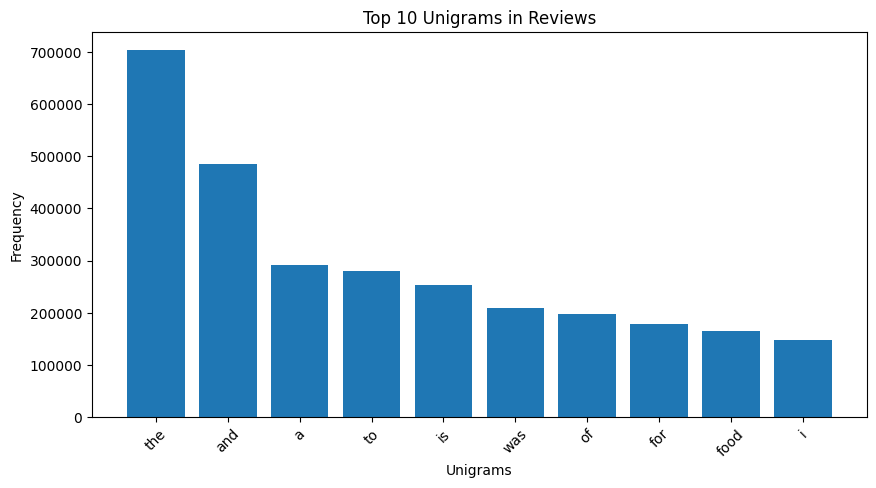

In [ ]:
from collections import Counter

# Function to generate unigrams
def generate_unigrams(text):
    words = text.split()
    return words  # Single words are unigrams

# Sample text (replace 'all_reviews' with your dataset)
# all_reviews = "your text or data here"

# Generate unigrams
unigrams = generate_unigrams(all_reviews)

# Count frequencies
unigram_counts = Counter(unigrams)

# Display top 10 unigrams
top_unigrams = unigram_counts.most_common(10)
print("Top 10 Unigrams:", top_unigrams)

# Plot the results
unigram_labels = [unigram for unigram, _ in top_unigrams]
unigram_counts = [freq for _, freq in top_unigrams]

plt.figure(figsize=(10, 5))
plt.bar(unigram_labels, unigram_counts)
plt.title("Top 10 Unigrams in Reviews")  # Corrected line
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


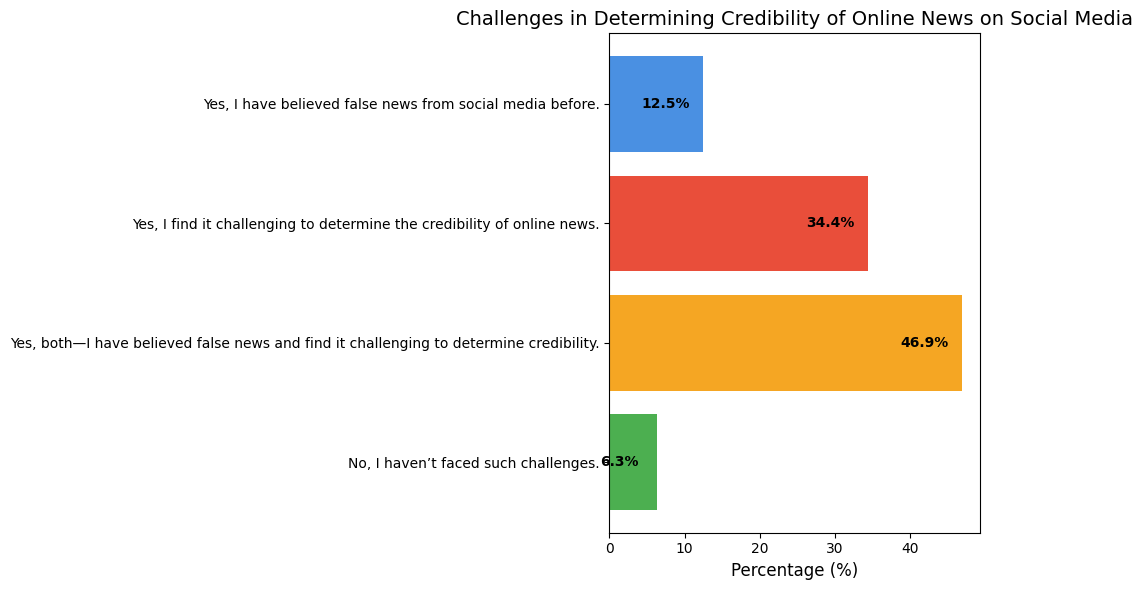

In [ ]:
import matplotlib.pyplot as plt

# Data for Q6 responses
labels = [
    "Yes, I have believed false news from social media before.",
    "Yes, I find it challenging to determine the credibility of online news.",
    "Yes, both—I have believed false news and find it challenging to determine credibility.",
    "No, I haven’t faced such challenges."
]
values = [12.5, 34.4, 46.9,  6.3]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, values, color=["#4A90E2", "#E94E3A", "#F5A623", "#4CAF50"])

# Add labels and title
plt.xlabel("Percentage (%)", fontsize=12)
plt.title("Challenges in Determining Credibility of Online News on Social Media", fontsize=14)

# Adding data labels on each bar
for bar in bars:
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2, f"{bar.get_width()}%",
             ha="center", va="center", color="black", fontsize=10, weight="bold")

# Reverse the y-axis for logical presentation
plt.gca().invert_yaxis()
plt.tight_layout()

# Save the graph as an image (optional)
plt.savefig("Q6_credibility_challenges.png", dpi=300)  # Saves the graph locally

# Display the graph
plt.show()


Top 10 Bigrams: [(('the', 'food'), 51785), (('of', 'the'), 47560), (('and', 'the'), 47006), (('it', 'was'), 30561), (('food', 'is'), 29969), (('in', 'the'), 26367), (('for', 'the'), 25121), (('food', 'was'), 23668), (('on', 'the'), 23037), (('is', 'a'), 22543)]


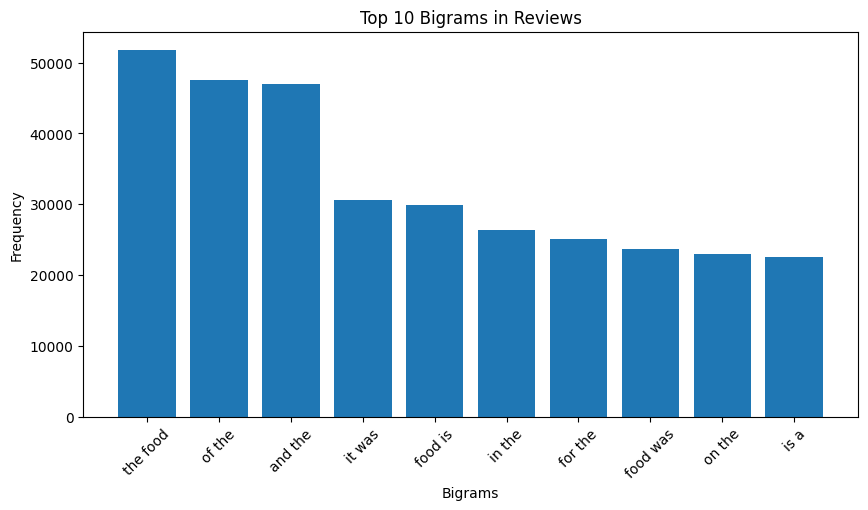

In [ ]:
from nltk.util import ngrams

# Function to generate N-grams
def generate_ngrams(text, n):
    words = text.split()
    return list(ngrams(words, n))

# Generate bigrams (2-grams)
bigrams = generate_ngrams(all_reviews, 2)

# Count frequencies
bigram_counts = Counter(bigrams)

# Display top 10 bigrams
top_bigrams = bigram_counts.most_common(10)
print("Top 10 Bigrams:", top_bigrams)

# Plot the results
bigram_labels = [' '.join(bigram) for bigram, _ in top_bigrams]
bigram_counts = [freq for _, freq in top_bigrams]

plt.figure(figsize=(10, 5))
plt.bar(bigram_labels, bigram_counts)
plt.title("Top 10 Bigrams in Reviews")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')


# Punctuation Removal
exclude = string.punctuation

def remove_punctuation(text):
    if not isinstance(text, str):  # Handle null values
        return text
    return text.translate(str.maketrans('', '', exclude))

combined_df['Review'] = combined_df['Review'].fillna('').apply(remove_punctuation)
print("\nAfter removing punctuation:")
print(combined_df['Review'].head(5))

# POS Tagging
import spacy

nlp = spacy.load('en_core_web_sm')

def pos_tagging(text):
    if not isinstance(text, str):
        return "Empty or Missing Review"
    doc = nlp(text)
    pos_tags = [(word.text, word.pos_, word.tag_, spacy.explain(word.tag_)) for word in doc]
    return pos_tags

sample_reviews = combined_df['Review'].head(5).tolist()
for i, review in enumerate(sample_reviews):
    print(f"Review {i+1}: {review}")
    pos_tags = pos_tagging(review)
    if isinstance(pos_tags, str):
        print(pos_tags)
    else:
        for word, pos, tag, explanation in pos_tags:
            print(f"{word} --> {pos} ({tag}): {explanation}")
    print("\n" + "-" * 80 + "\n")

# Visualization
from spacy import displacy
options = {
    'distance': 80,
    'compact': True,
    'color': '#fff',
    'bg': '#00a65a'
}

for review in sample_reviews:
    if isinstance(review, str) and len(review.split()) > 1:
        sample_doc = nlp(review)
        displacy.render(sample_doc, style='dep', jupyter=True, options=options)

# Stopword Removal
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if not isinstance(text, str):
        return text
    return " ".join([word for word in text.split() if word.lower() not in stop_words])

combined_df['Review'] = combined_df['Review'].apply(remove_stopwords)
print("\nAfter removing stopwords:")
print(combined_df['Review'].head(5))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



After removing punctuation:
0    David Thanga Mikail and Chef Steven gave brill...
1    We visited for family celebration and as usual...
2    Perfect dinner after a long journeyAfter trave...
3    Had a great Tomahawk for me and hubby thanks t...
4    Excellent ambient Excellent service by David T...
Name: Review, dtype: object
Review 1: David Thanga Mikail and Chef Steven gave brilliant service and the food was excellent Would recommend
David --> PROPN (NNP): noun, proper singular
Thanga --> PROPN (NNP): noun, proper singular
Mikail --> PROPN (NNP): noun, proper singular
and --> CCONJ (CC): conjunction, coordinating
Chef --> PROPN (NNP): noun, proper singular
Steven --> PROPN (NNP): noun, proper singular
gave --> VERB (VBD): verb, past tense
brilliant --> ADJ (JJ): adjective (English), other noun-modifier (Chinese)
service --> NOUN (NN): noun, singular or mass
and --> CCONJ (CC): conjunction, coordinating
the --> DET (DT): determiner
food --> NOUN (NN): noun, singular or mass
was --


After removing stopwords:
0    David Thanga Mikail Chef Steven gave brilliant...
1    visited family celebration usual restaurant do...
2    Perfect dinner long journeyAfter travelling DK...
3    great Tomahawk hubby thanks David Azzu great C...
4    Excellent ambient Excellent service David Than...
Name: Review, dtype: object



Top 10 Bigrams After Processing:
good food: 17123
food good: 16068
good service: 10461
great food: 8624
food great: 7951
service good: 7789
nice place: 7344
nice food: 6971
must try: 6789
food nice: 6752


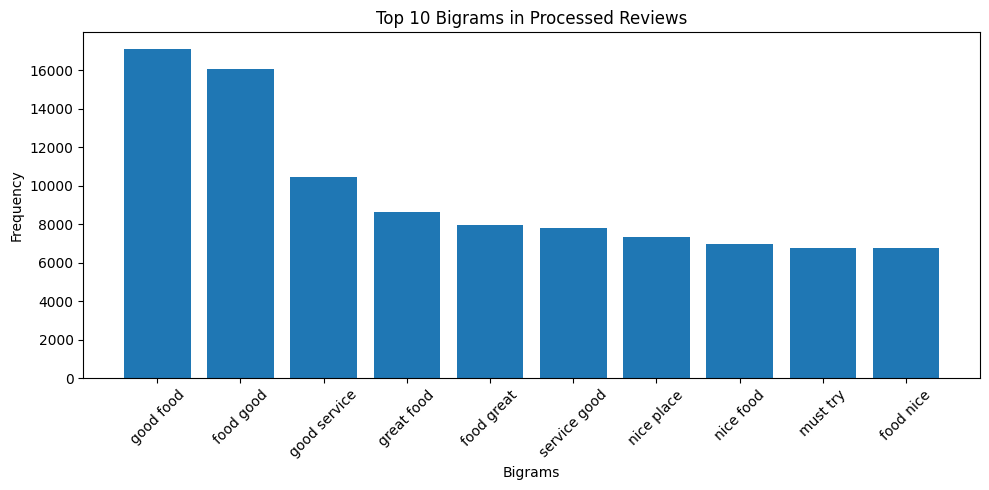

In [ ]:
# Combine all cleaned reviews into a single text for analysis
processed_reviews = ' '.join(combined_df['Review'].dropna().tolist()).lower()

# Function to generate N-grams
def generate_ngrams(text, n):
    words = text.split()
    return list(ngrams(words, n))

# Generate bigrams (2-grams) from processed reviews
bigrams = generate_ngrams(processed_reviews, 2)

# Count frequencies of bigrams
bigram_counts = Counter(bigrams)

# Display the top 10 bigrams
top_bigrams = bigram_counts.most_common(10)
print("\nTop 10 Bigrams After Processing:")
for bigram, freq in top_bigrams:
    print(f"{' '.join(bigram)}: {freq}")

# Plot the results
bigram_labels = [' '.join(bigram) for bigram, _ in top_bigrams]
bigram_frequencies = [freq for _, freq in top_bigrams]

plt.figure(figsize=(10, 5))
plt.bar(bigram_labels, bigram_frequencies)
plt.title("Top 10 Bigrams in Processed Reviews")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Unigrams After Processing:
food: 212027
good: 149435
place: 83856
service: 83650
great: 73150
nice: 70578
restaurant: 64002
staff: 46288
delicious: 42352
friendly: 38344


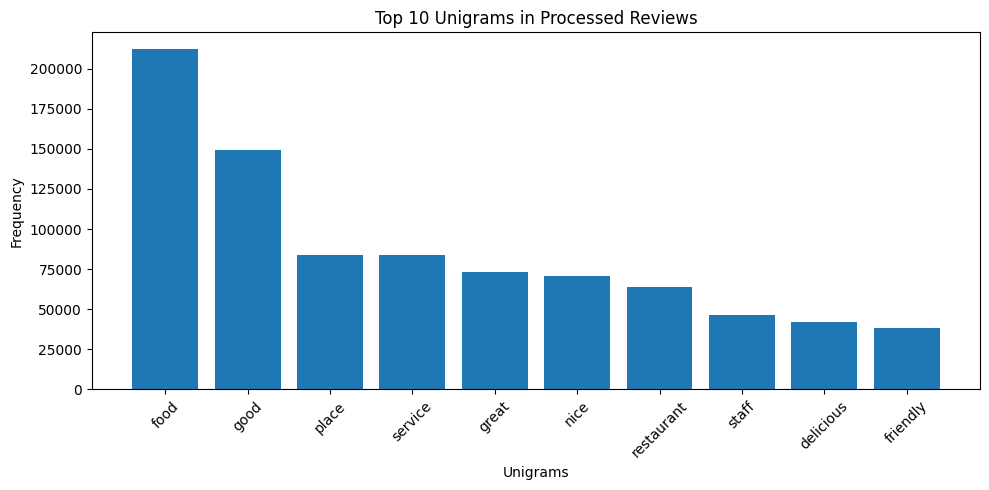

In [ ]:

# Combine all cleaned reviews into a single text for analysis
processed_reviews = ' '.join(combined_df['Review'].dropna().tolist()).lower()

# Function to generate N-grams (modified to handle unigrams by setting n=1)
def generate_ngrams(text, n):
    words = text.split()
    return list(ngrams(words, n)) if n > 1 else words  # Return words directly for unigrams

# Generate unigrams (1-grams) from processed reviews
unigrams = generate_ngrams(processed_reviews, 1)

# Count frequencies of unigrams
unigram_counts = Counter(unigrams)

# Display the top 10 unigrams
top_unigrams = unigram_counts.most_common(10)
print("\nTop 10 Unigrams After Processing:")
for unigram, freq in top_unigrams:
    print(f"{unigram}: {freq}")

# Plot the results
unigram_labels = [unigram for unigram, _ in top_unigrams]
unigram_frequencies = [freq for _, freq in top_unigrams]

plt.figure(figsize=(10, 5))
plt.bar(unigram_labels, unigram_frequencies)
plt.title("Top 10 Unigrams in Processed Reviews")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sentiment Summary:
Sentiment_Category
Positive    311049
Negative     31089
Neutral      19646
Name: count, dtype: int64

Sample Reviews with Sentiment Analysis:
                                              Review  Sentiment  \
0  David Thanga Mikail Chef Steven gave brilliant...   0.950000   
1  visited family celebration usual restaurant do...   0.110000   
2  Perfect dinner long journeyAfter travelling DK...   0.550000   
3  great Tomahawk hubby thanks David Azzu great C...   0.458333   
4  Excellent ambient Excellent service David Than...   0.933333   
5  Come group clients Excellent food try beef rea...   0.300000   
6  Amazing food hospitality David Azzu chef Steve...   0.271429   
7  Kudos David Azzu Chef Steven Mikail ThangaGood...   0.500000   
8  Food awesome David Aziz Thanga awesome Service...   0.833333   
9  food excellent service outstanding staffs extr...   0.443750   

  Sentiment_Category  
0           Positive  
1           Positive  
2           Positive  
3       

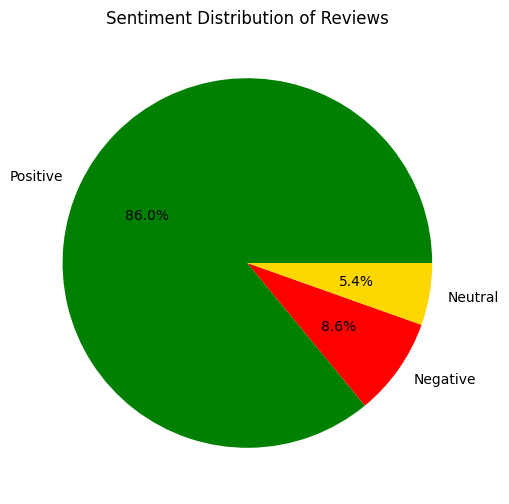

In [ ]:
from textblob import TextBlob

# Load the dataset
combined_df['Sentiment'] = combined_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Define sentiment categories based on polarity score
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification to the dataset
combined_df['Sentiment_Category'] = combined_df['Sentiment'].apply(classify_sentiment)

# Summary of sentiment analysis
sentiment_summary = combined_df['Sentiment_Category'].value_counts()
print("Sentiment Summary:")
print(sentiment_summary)

# Display some sample reviews with their sentiment
sample_reviews = combined_df[['Review', 'Sentiment', 'Sentiment_Category']].head(10)
print("\nSample Reviews with Sentiment Analysis:")
print(sample_reviews)

# Plot a pie chart of the sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sentiment_summary.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'gold'])
plt.title("Sentiment Distribution of Reviews")
plt.ylabel('')
plt.show()
